# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import json
from scipy.stats import linregress

from scipy import stats



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random Lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each Lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))




604


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [125]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [157]:
response = requests.get(query_url + 'perth').json()
#print(json.dumps(response, indent=4, sort_keys=True))
print(response.keys())
print(response['clouds'].keys())
response

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])
dict_keys(['all'])


{'coord': {'lon': 115.8333, 'lat': -31.9333},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 12.22,
  'feels_like': 11.33,
  'temp_min': 12.22,
  'temp_max': 12.22,
  'pressure': 1026,
  'humidity': 70,
  'sea_level': 1026,
  'grnd_level': 1023},
 'visibility': 10000,
 'wind': {'speed': 3.4, 'deg': 66, 'gust': 7.19},
 'clouds': {'all': 1},
 'dt': 1660230540,
 'sys': {'country': 'AU', 'sunrise': 1660172243, 'sunset': 1660211199},
 'timezone': 28800,
 'id': 2063523,
 'name': 'Perth',
 'cod': 200}

In [158]:
# Creating Lists for each important value we are trying to store from the json response we receive back from the API once it has received the location we are interested in.

Location = []
Lat = []
Long = []
Temp = []
MaxTemp = []
MinTemp = []
Humidity = []
Clouds = []
Wind = []
Country = []
Datetime = []
# For all the locations in our generated list, irritate through the locations, sending it to the API and when received back, TRY to store the values we are interested in and print in terminal to inform the user it was successful, and if the location isn't available through the API print out a message to inform the user.

for city in cities:
    response = requests.get(query_url + city).json()
    try: 
        Lat.append(response['coord']['lat'])                    # The response for the Lat and Long is placed first and second in the TRY logic as these two variables are to be tested first. if they are not available in the response we dont want to store the City in our new list but rather we want the logic to exit the condition and iterate to the next City in our list.
        Long.append(response['coord']['lon'])
        Location.append(city)
        Temp.append(response['main']['temp'])
        MaxTemp.append(response['main']['temp_max'])
        MinTemp.append(response['main']['temp_min'])
        Humidity.append(response['main']['humidity'])
        Clouds.append(response['clouds']['all'])
        Wind.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Datetime.append(response['dt'])
        print(f'Location number: {len(Country)} the city of: {city} has been added to the list of possible travel destinations')
    except KeyError:
        print(f"The city of: {city} is unavailable")


Location number: 1 the city of: dikson has been added to the list of possible travel destinations
Location number: 2 the city of: vaini has been added to the list of possible travel destinations
Location number: 3 the city of: punta arenas has been added to the list of possible travel destinations
The city of: belushya guba is unavailable
Location number: 4 the city of: riga has been added to the list of possible travel destinations
Location number: 5 the city of: puerto ayora has been added to the list of possible travel destinations
Location number: 6 the city of: pevek has been added to the list of possible travel destinations
Location number: 7 the city of: noyabrsk has been added to the list of possible travel destinations
Location number: 8 the city of: faanui has been added to the list of possible travel destinations
Location number: 9 the city of: courtenay has been added to the list of possible travel destinations
Location number: 10 the city of: grand gaube has been added to 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [159]:
# Storing the list of values we stored into a main dataframe (weather_data)

weather_dict = {
    "City": Location,
    "Lat": Lat,
    "Long": Long,
    "Temp": Temp,
    "Max Temp": MaxTemp,
    "Min Temp": MinTemp,
    "Humidity" : Humidity,
    "Clouds": Clouds,
    "Wind" : Wind,
    "Country" : Country,
    "Datetime" : Datetime
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

# Output the dataframe complied into a CSV that will be used for the VacationPy 
weather_data.to_csv('City_Data.csv', index=False)

In [160]:
# inspecting the weather_data dataframe
weather_data.head()

,City,Lat,Long,Temp,Max Temp,Min Temp,Humidity,Clouds,Wind,Country,Datetime
0,dikson,73.5069,80.5464,5.92,5.92,5.92,97,100,5.08,RU,1660230932
1,vaini,-21.2000,-175.2000,21.09,21.09,21.09,100,75,4.12,TO,1660230932
2,punta arenas,-53.1500,-70.9167,2.98,2.98,2.98,72,20,2.26,CL,1660230689
3,riga,57.0000,24.0833,26.71,27.24,26.04,35,0,2.06,LV,1660230913
4,puerto ayora,-0.7393,-90.3518,21.15,21.15,21.15,85,100,4.47,EC,1660230933


In [130]:
# checking dataset for even rows amongst all columns 
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      1118 non-null   object 
 1   Lat       1118 non-null   float64
 2   Long      1118 non-null   float64
 3   Temp      1118 non-null   float64
 4   Max Temp  1118 non-null   float64
 5   Min Temp  1118 non-null   float64
 6   Humidity  1118 non-null   int64  
 7   Clouds    1118 non-null   int64  
 8   Wind      1118 non-null   float64
 9   Country   1118 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 87.5+ KB


## Inspect the data and remove the cities where the Humidity > 100%.
----
Skip this step if there are no cities that have Humidity > 100%. 

In [161]:
#  Test to see if any locations have a humidity above 100s
(weather_data.loc[weather_data['Humidity'] > 100, :]).info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      0 non-null      object 
 1   Lat       0 non-null      float64
 2   Long      0 non-null      float64
 3   Temp      0 non-null      float64
 4   Max Temp  0 non-null      float64
 5   Min Temp  0 non-null      float64
 6   Humidity  0 non-null      int64  
 7   Clouds    0 non-null      int64  
 8   Wind      0 non-null      float64
 9   Country   0 non-null      object 
 10  Datetime  0 non-null      int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 0.0+ bytes


In [162]:
# Drop any locations that had a humidity over 100
# As the locations are generated randomly, this step is included as a fail safe 
weather_data = weather_data.loc[weather_data['Humidity'] <= 100, :]
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      559 non-null    object 
 1   Lat       559 non-null    float64
 2   Long      559 non-null    float64
 3   Temp      559 non-null    float64
 4   Max Temp  559 non-null    float64
 5   Min Temp  559 non-null    float64
 6   Humidity  559 non-null    int64  
 7   Clouds    559 non-null    int64  
 8   Wind      559 non-null    float64
 9   Country   559 non-null    object 
 10  Datetime  559 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 52.4+ KB


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [163]:
plt.rcParams["figure.figsize"] = (15,15)

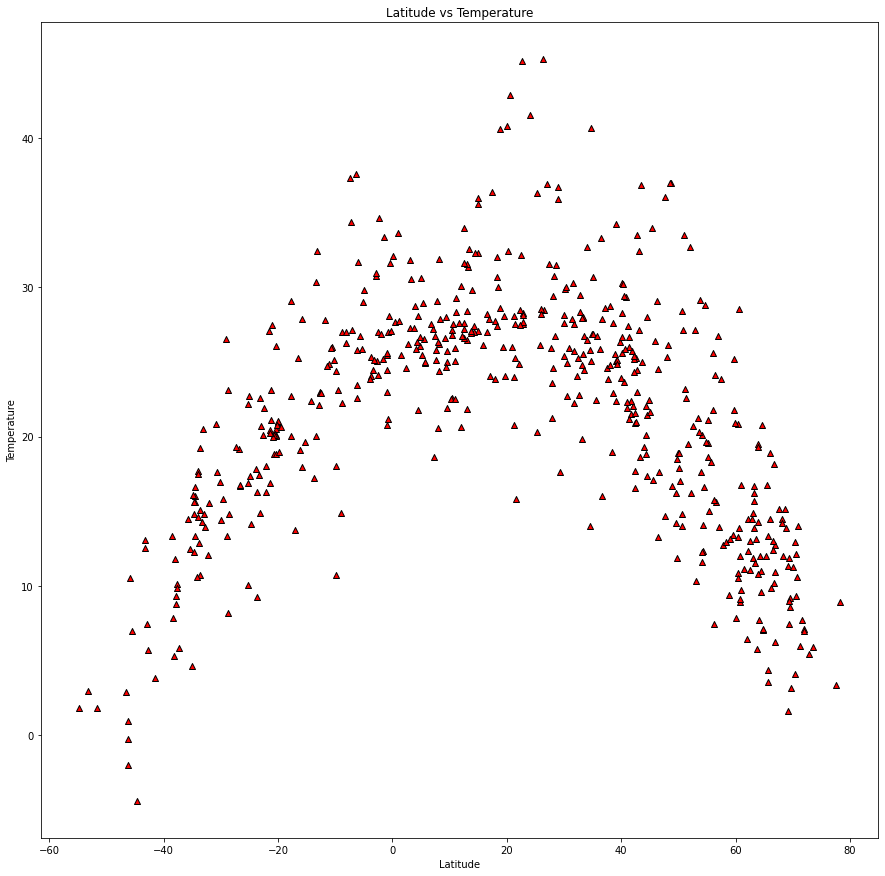

<Figure size 1080x1080 with 0 Axes>

In [165]:
x = weather_data['Lat']
y = weather_data['Temp']

plt.scatter(x,y,  marker="^", facecolors="red", edgecolors="black")
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig('Latitude vs Temperature.png')

## Latitude vs. Humidity Plot

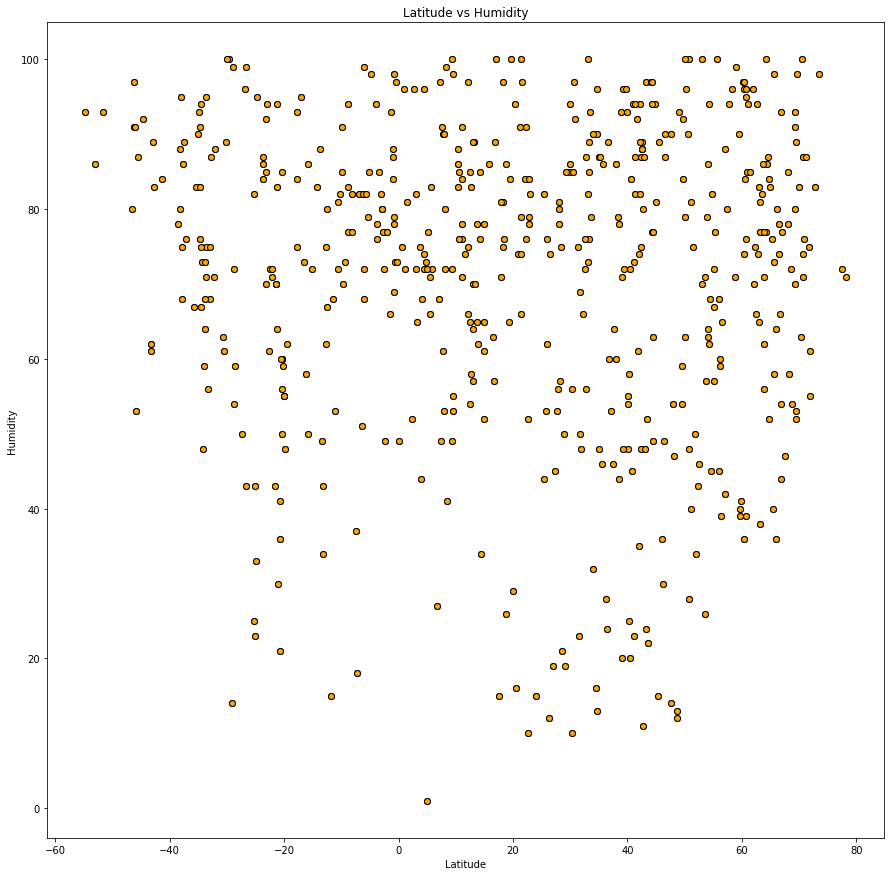

In [135]:
x = weather_data["Lat"]
y = weather_data['Humidity']


plt.scatter(x,y,  marker="o", facecolors="orange", edgecolors="black")
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Latitude vs Humidity.png')

## Latitude vs. Cloudiness Plot

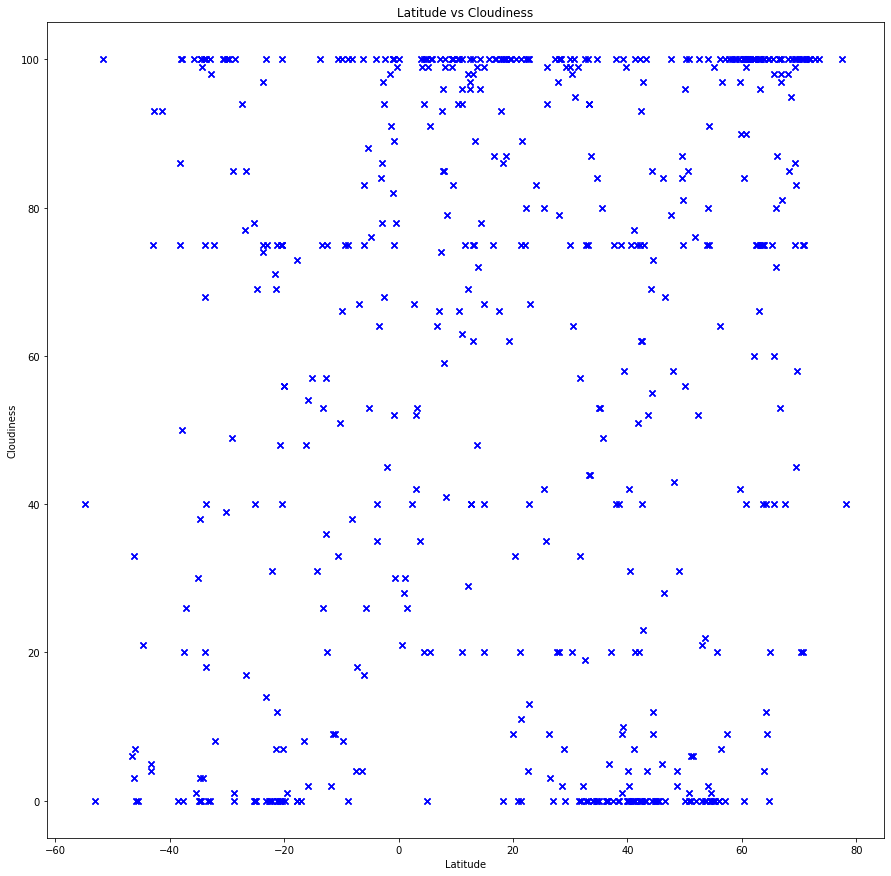

In [136]:
x = weather_data["Lat"]
y = weather_data['Clouds']


plt.scatter(x,y,  marker="x", facecolors="blue")
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Latitude vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

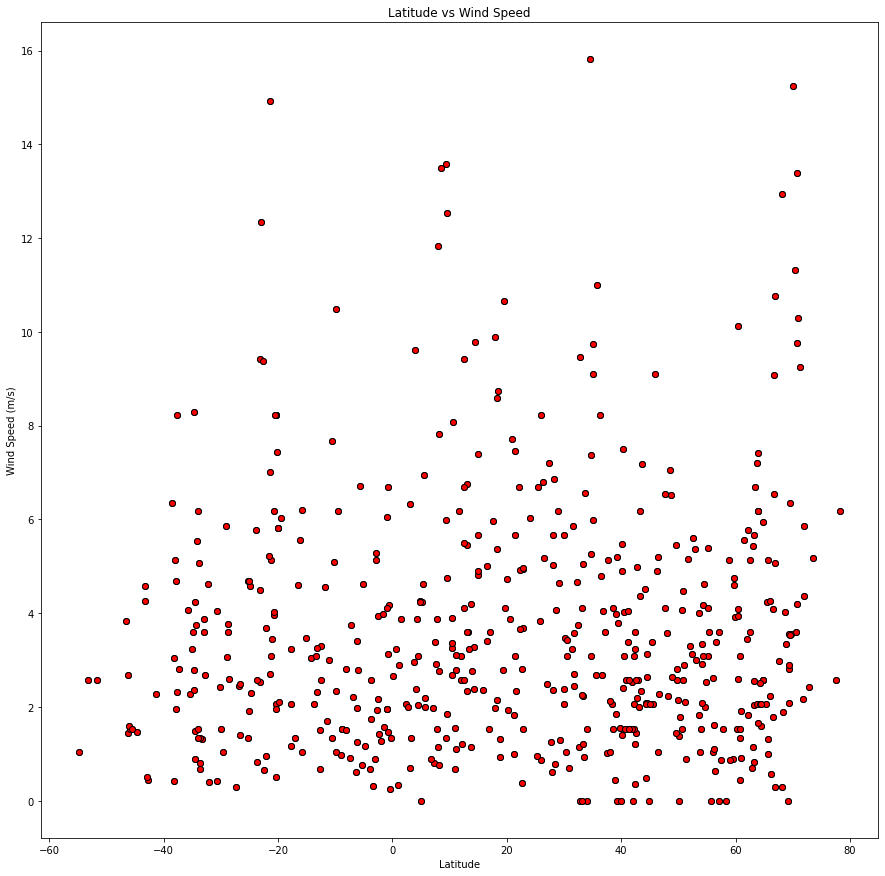

In [137]:
x = weather_data["Lat"]
y = weather_data['Wind']


plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
plt.savefig('Latitude vs Wind Speed.png')

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

In [152]:
# We are going to separate cities by their hemisphere:

northern_hem = weather_data.loc[weather_data['Lat'] >= 0,:]
southern_hem = weather_data.loc[weather_data['Lat'] < 0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [140]:
def regression_line (x,y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    return regress_values

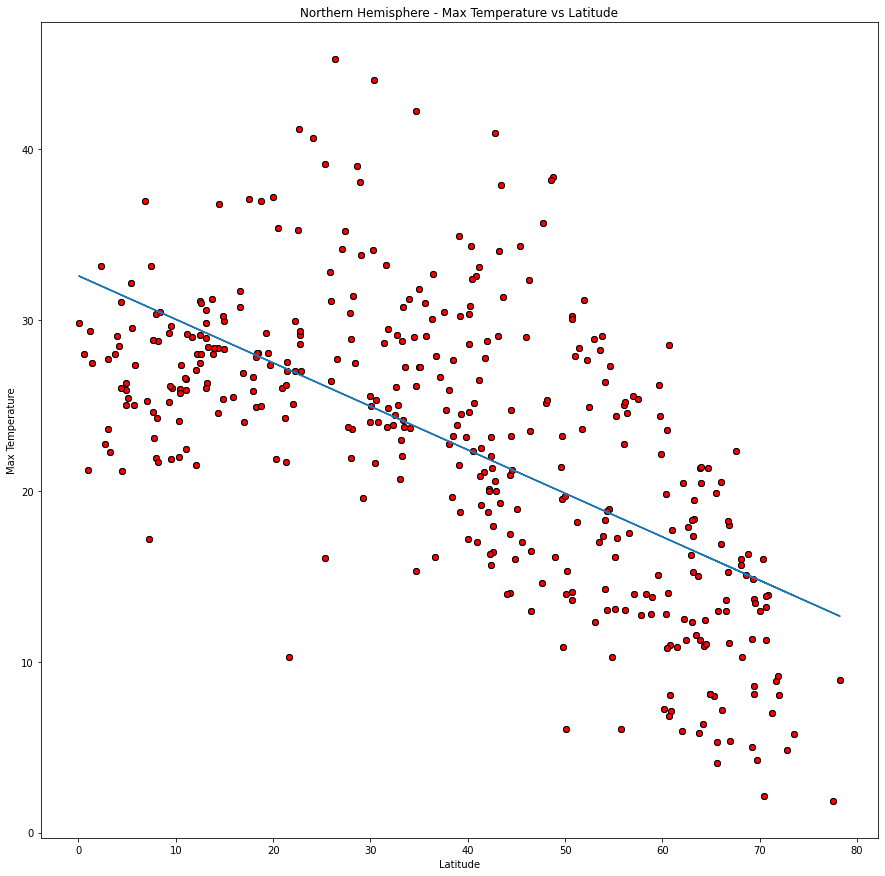

The correlation coefficient between the Max Temp and Latitude (Northern Hemisphere) is -0.64


In [151]:
y = northern_hem['Max Temp']
x = pd.Series(northern_hem['Lat'])

reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x,reg_line)
plt.title(' Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()
plt.savefig('Northern Hemisphere - Max Temperature vs Latitude.png')
print(f"The correlation coefficient between the Max Temp and Latitude (Northern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

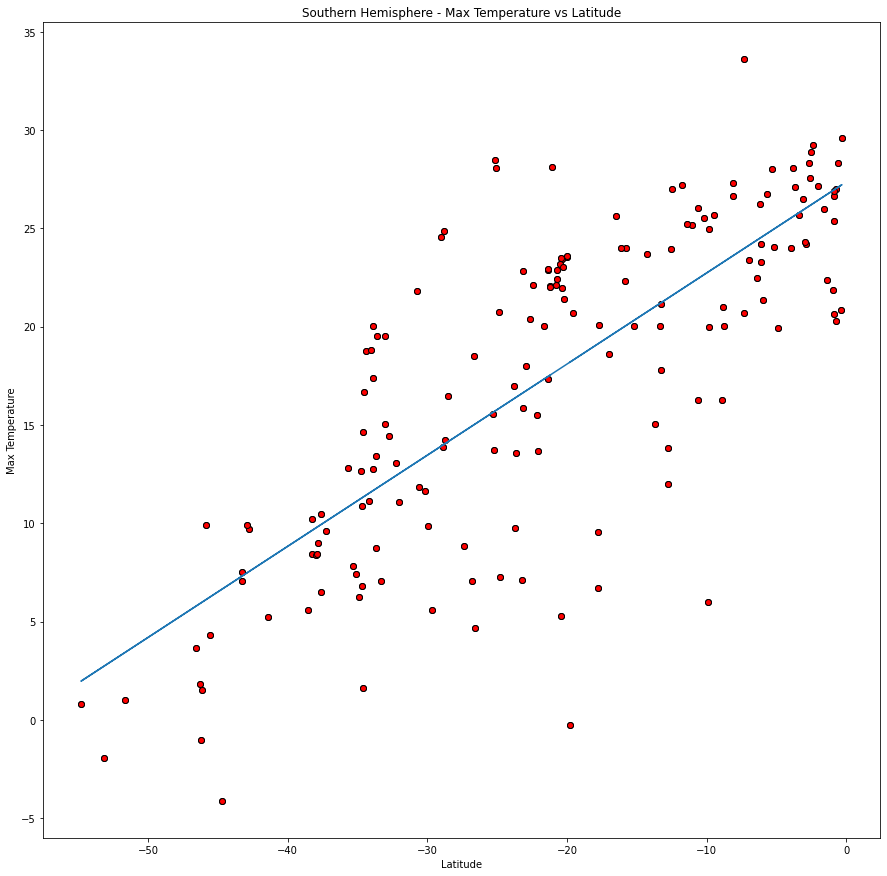

The correlation coefficient between the Max Temp and Latitude (Southern Hemisphere) is 0.77


In [143]:
y = southern_hem['Max Temp']
x = pd.Series(southern_hem['Lat'])

reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x, reg_line)
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()
plt.savefig('Southern Hemisphere - Max Temperature vs Latitude.png')
print(f"The correlation coefficient between the Max Temp and Latitude (Southern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

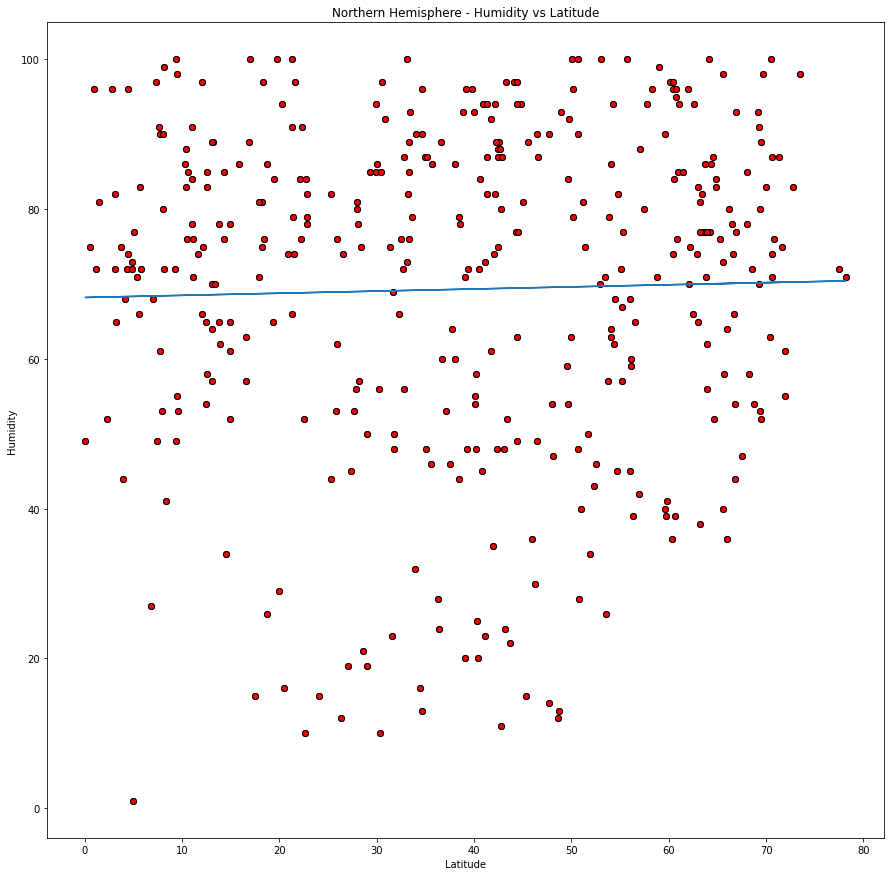

The correlation coefficient between the Humidity and Latitude (Northern Hemisphere) is 0.03


In [144]:
y = northern_hem['Humidity']
x = pd.Series(northern_hem['Lat'])

reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x, reg_line)
plt.title('Northern Hemisphere -Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Northern Hemisphere - Humidity vs Latitude.png')
print(f"The correlation coefficient between the Humidity and Latitude (Northern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

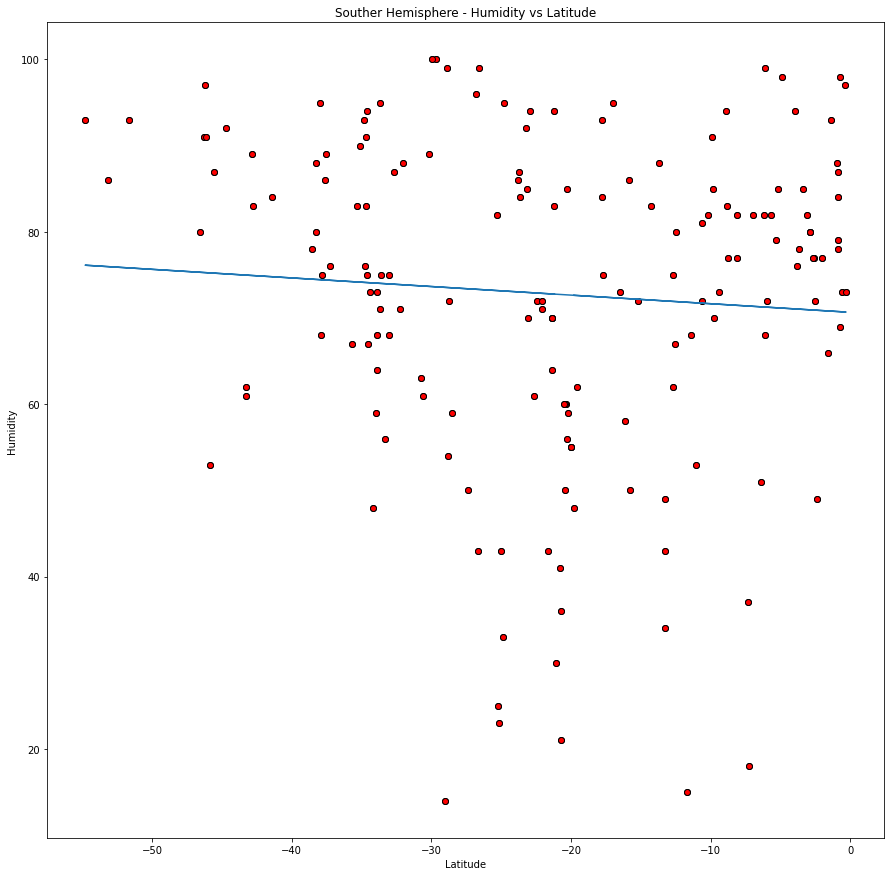

The correlation coefficient between the Humidity and Latitude (Southern Hemisphere) is -0.07


In [145]:
y = southern_hem['Humidity']
x = pd.Series(southern_hem['Lat'])

reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x, reg_line)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig('Souther Hemisphere - Humidity vs Latitude.png')
print(f"The correlation coefficient between the Humidity and Latitude (Southern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

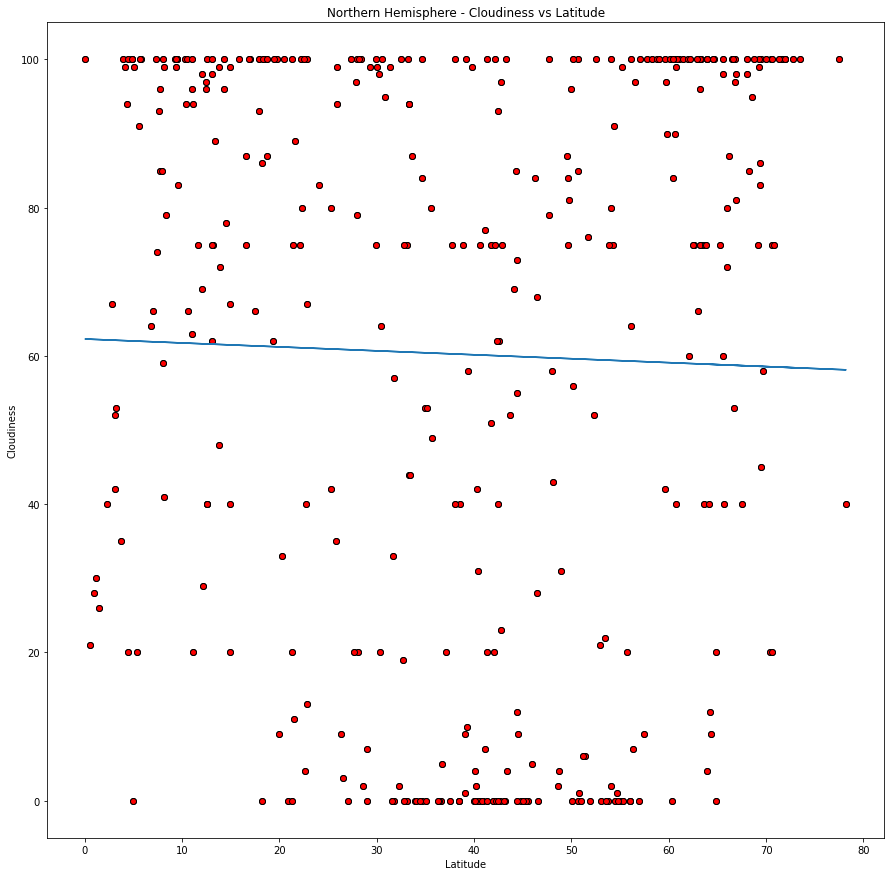

The correlation coefficient between the Cloudiness and Latitude (Northern Hemisphere) is -0.03


In [146]:
y = northern_hem['Clouds']
x = pd.Series(northern_hem['Lat'])


reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x,reg_line)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Northern Hemisphere - Cloudiness vs Latitude.png')
print(f"The correlation coefficient between the Cloudiness and Latitude (Northern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

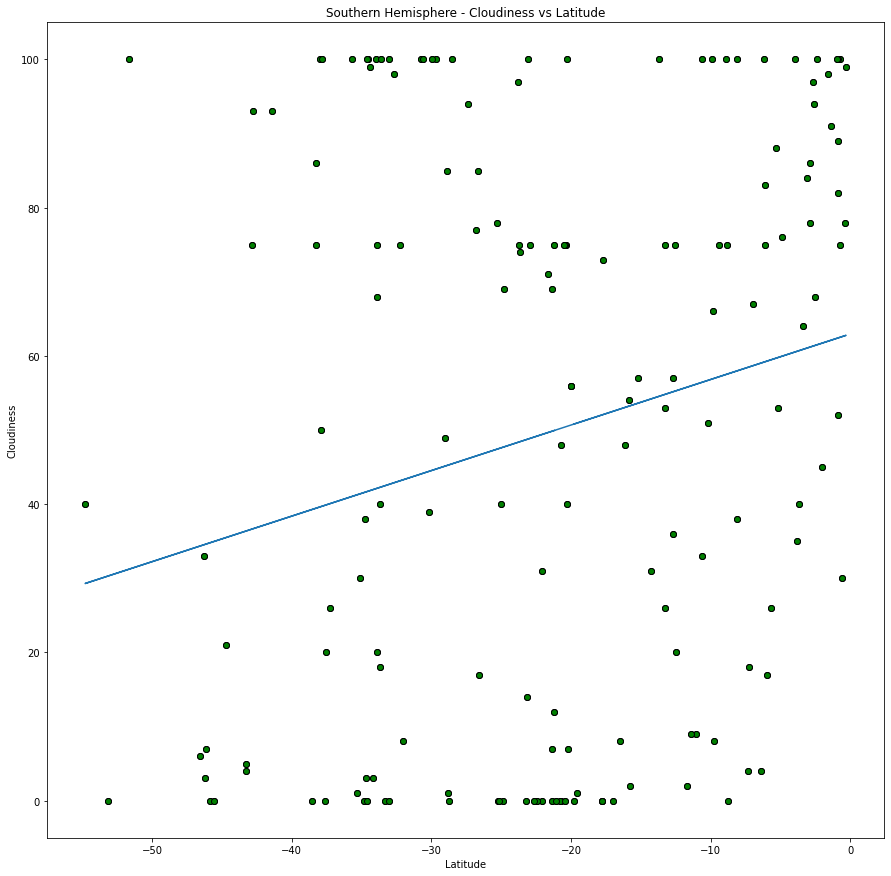

The correlation coefficient between the Cloudiness and Latitude (Southern Hemisphere) is 0.22


In [147]:
y = southern_hem['Clouds']
x = pd.Series(southern_hem['Lat'])

reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="green", edgecolors="black")
plt.plot(x, reg_line)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('Southern Hemisphere - Cloudiness vs Latitude.png')
print(f"The correlation coefficient between the Cloudiness and Latitude (Southern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

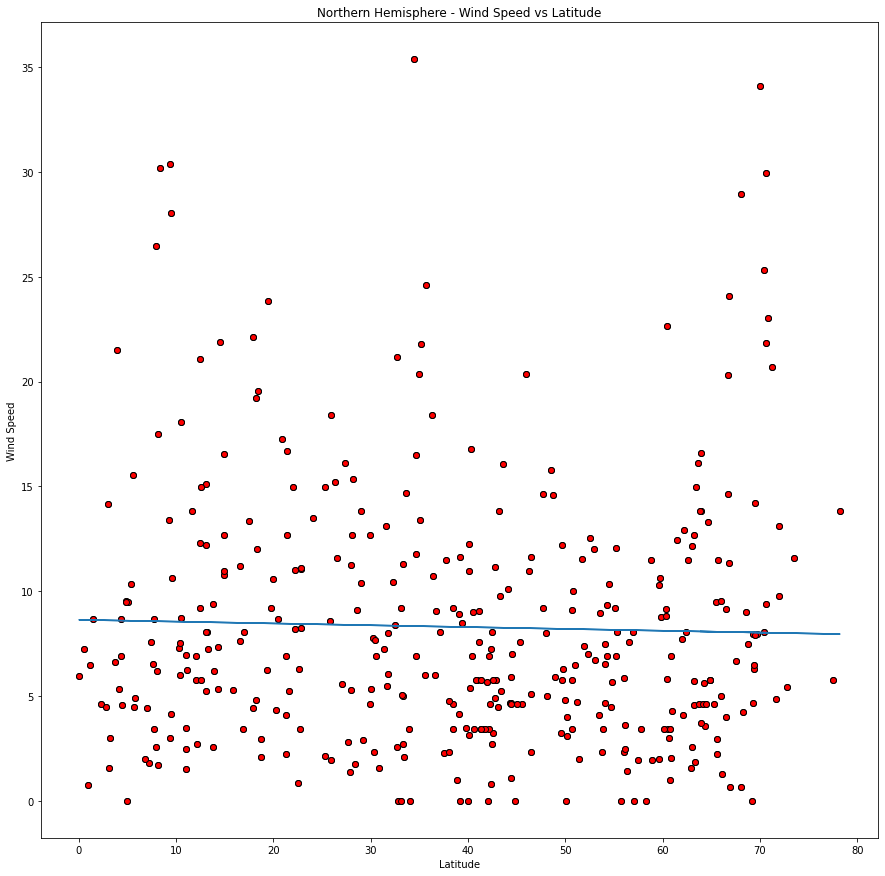

The correlation coefficient between the Cloudiness and Latitude (Northern Hemisphere) is -0.03


In [148]:
y = [i*2.23694 for i in northern_hem['Wind']]
x = pd.Series(northern_hem['Lat'])


reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x, reg_line)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('Northern Hemisphere - Wind Speed vs Latitude.png')
print(f"The correlation coefficient between the Cloudiness and Latitude (Northern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

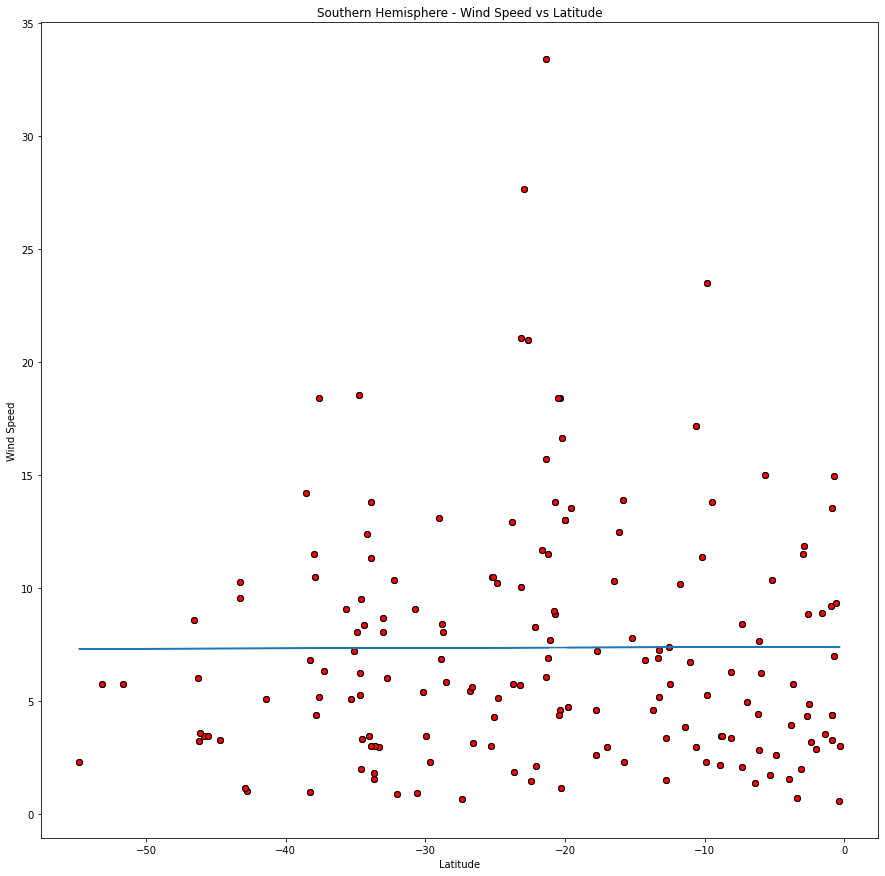

The correlation coefficient between the Cloudiness and Latitude (Northern Hemisphere) is 0.0


In [153]:
y = [i*2.23694 for i in southern_hem['Wind']]
x = pd.Series(southern_hem['Lat'])


reg_line = regression_line(x,y)
plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.plot(x, reg_line)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('Southern Hemisphere - Wind Speed vs Latitude.png')
print(f"The correlation coefficient between the Cloudiness and Latitude (Northern Hemisphere) is {round(st.pearsonr(x,y)[0],2)}")